In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib notebook
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("formatted_stats.csv")
df.describe()
# df.drop(columns=['Unnamed: 0'], inplace=True)

,index,batch_size,time_quantum,n1,n2,n3,wt_1,wt_2,wt_3,tat_1,tat_2,tat_3
count,51030.000000,51030.0,5.103000e+04,51030.000000,51030.000000,51030.000000,51030.000000,51030.000000,51030.000000,51030.000000,51030.000000,51030.000000
mean,25514.500000,100.0,3.067847e+08,172606.212032,263088.575348,484305.212620,0.004090,0.019530,0.028406,0.007444,0.039287,0.080755
std,14731.236455,0.0,7.514696e+08,255668.463985,321367.172290,359285.266806,0.008326,0.023610,0.032320,0.011586,0.044846,0.060895
min,0.000000,100.0,1.000000e+02,10000.000000,10000.000000,10000.000000,0.000002,0.001904,0.002230,0.000156,0.002769,0.004847
25%,12757.250000,100.0,2.500000e+02,25000.000000,25000.000000,100000.000000,0.000009,0.006152,0.010365,0.000770,0.011171,0.026637
50%,25514.500000,100.0,1.000000e+03,75000.000000,75000.000000,500000.000000,0.000021,0.010446,0.016555,0.001540,0.020557,0.067716
75%,38271.750000,100.0,5.000000e+03,250000.000000,500000.000000,750000.000000,0.004236,0.022899,0.029468,0.009945,0.042958,0.120874
max,51029.000000,100.0,2.147484e+09,1000000.000000,1000000.000000,1000000.000000,0.211651,0.290994,0.227410,0.301237,0.333062,0.375284


In [8]:
filtered = df[['n1', 'n2', 'n3']]
filtered.value_counts()

n1       n2       n3     
10000    50000    1000000    230
         500000   1000000    228
25000    75000    1000000    225
10000    50000    750000     221
25000    500000   1000000    220
                            ... 
50000    1000000  25000       10
         750000   10000       10
750000   25000    10000       10
1000000  250000   10000       10
750000   50000    10000       10
Length: 729, dtype: int64

In [4]:
# plt.figure(figsize=(20, 10))
tq = df['time_quantum'].unique()[1:]
filtered = df.loc[
    (df["n3"] == 25000) & (df["n2"] == 10000) & (df["scheduling_algorithm"] == "rr")
]

tq_plt = {
    q: filtered[filtered["time_quantum"] == q] for q in tq
}

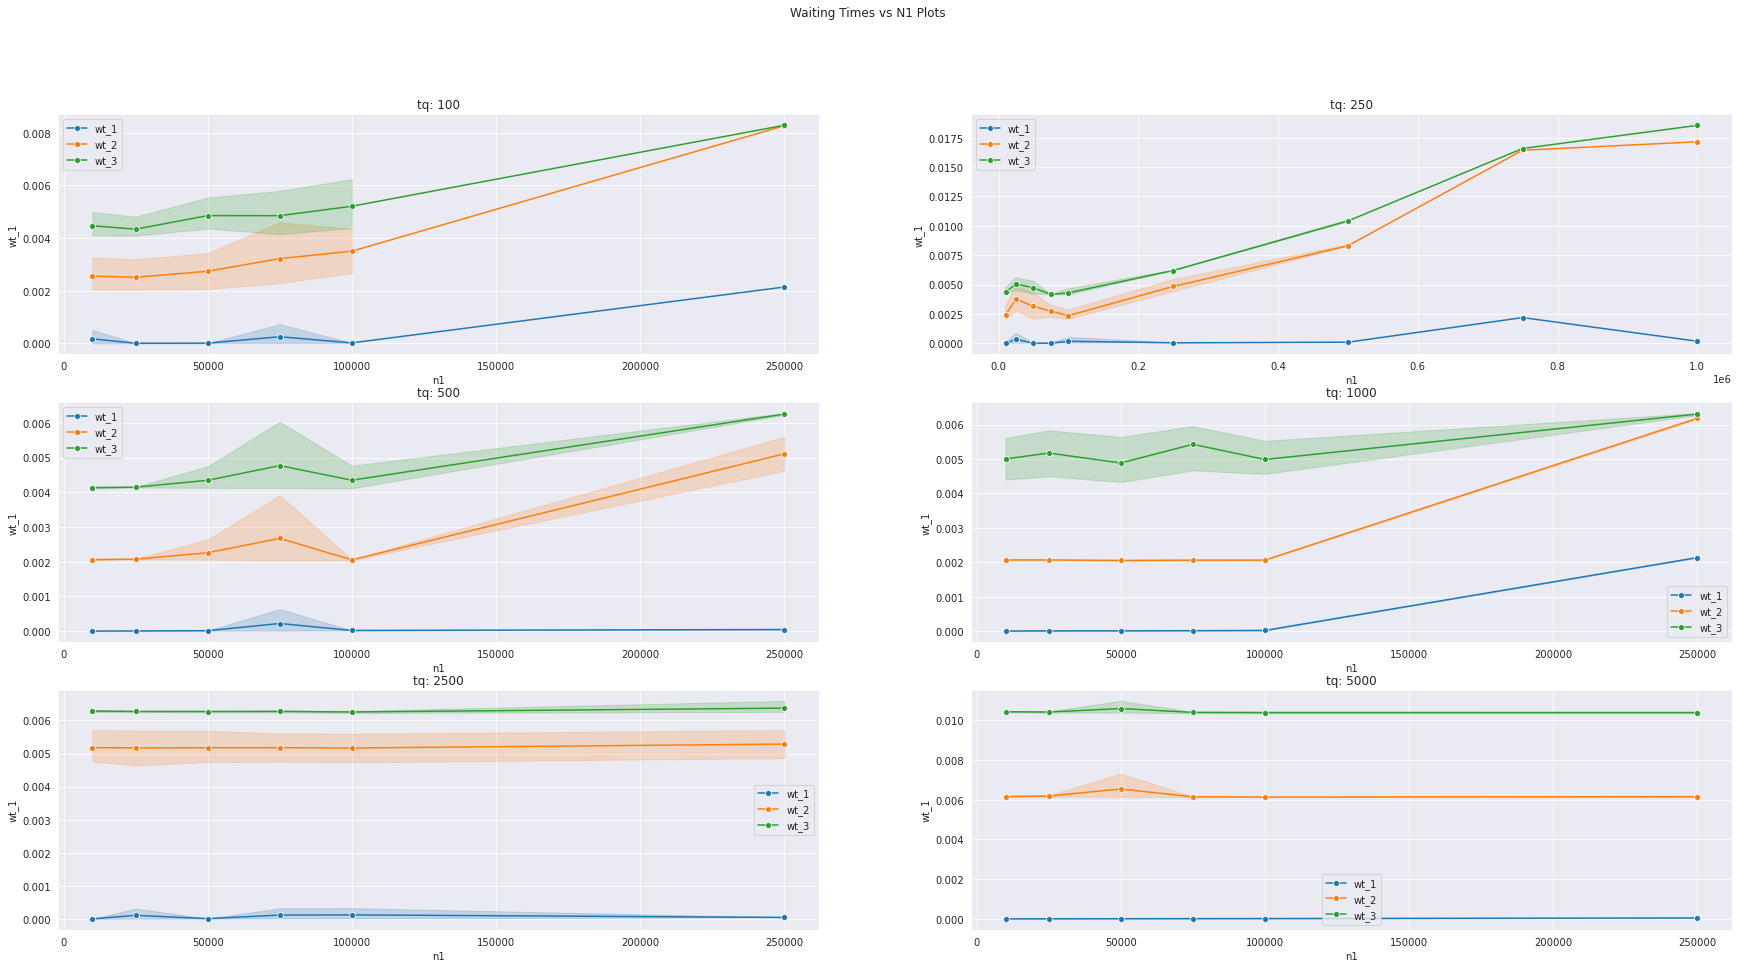

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(30, 15))
fig.suptitle('Waiting Times vs N1 Plots')

for i, (k, data) in enumerate(tq_plt.items()):
    x, y = i % 2, i // 2
    axs[y, x].set_title(f'tq: {k}')
    # print(i, x, y)
    sns.lineplot(data=data, x="n1", y="wt_1", marker='o', label="wt_1", ax=axs[y, x])
    sns.lineplot(data=data, x="n1", y="wt_2", marker='o', label="wt_2", ax=axs[y, x])
    sns.lineplot(data=data, x="n1", y="wt_3", marker='o', label="wt_3", ax=axs[y, x])


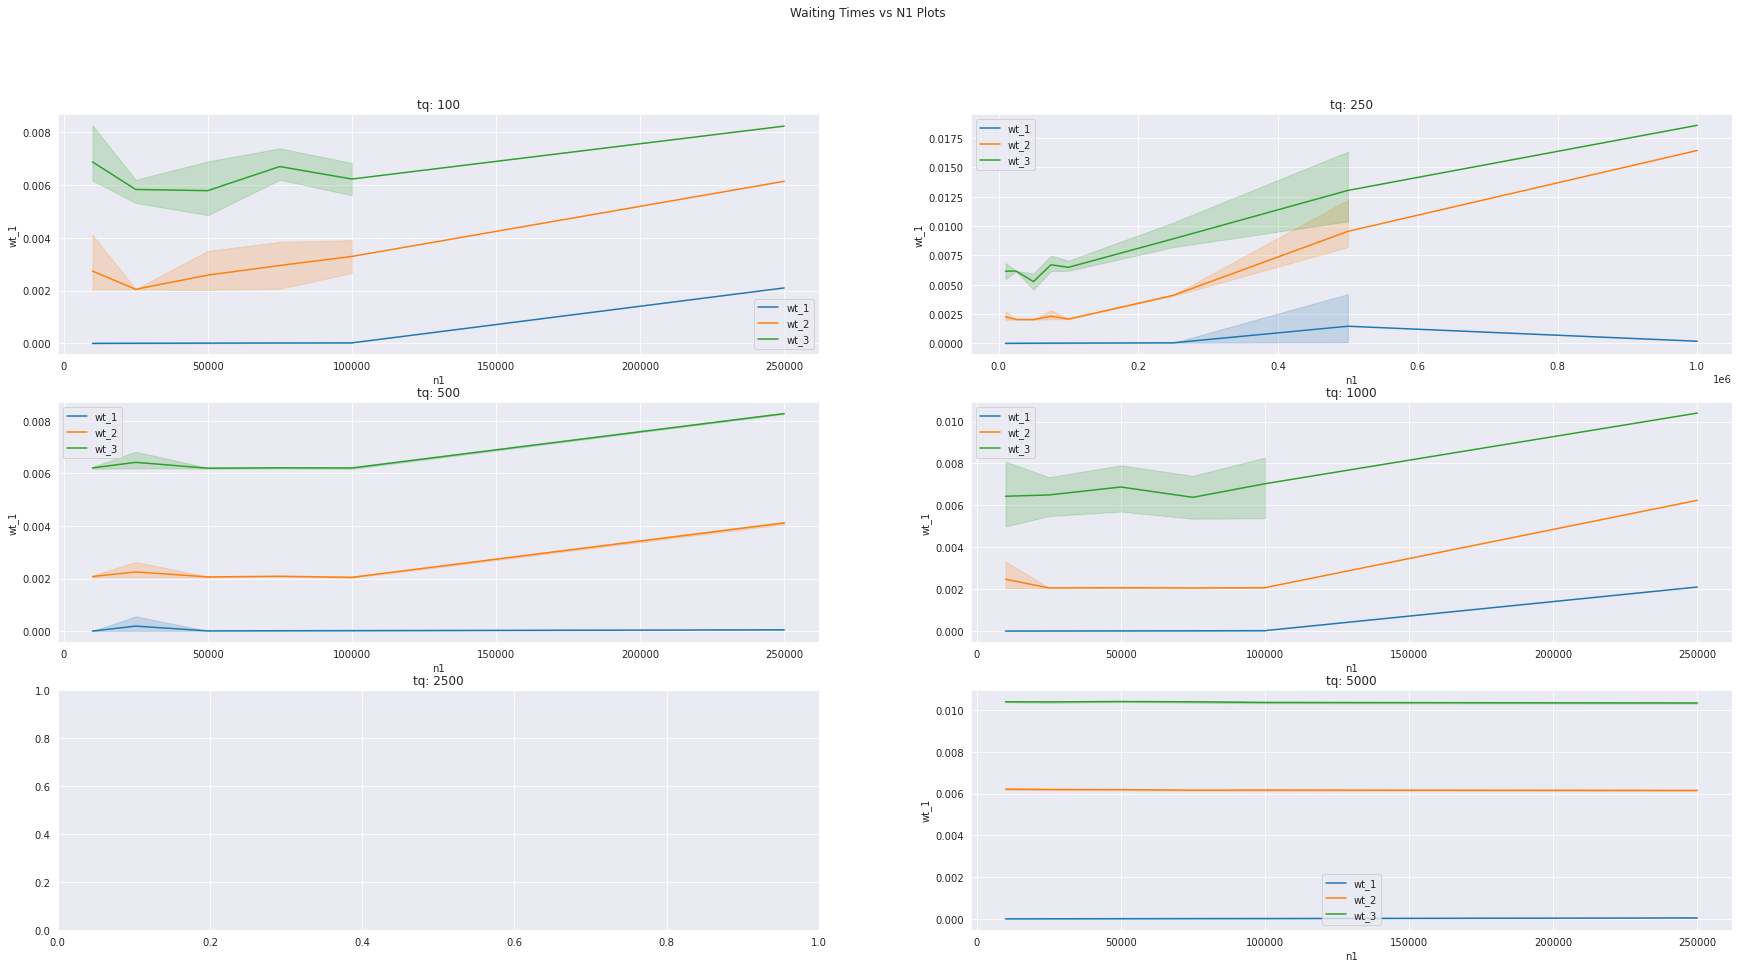

In [6]:
# plt.figure(figsize=(20, 10))
filtered = df.loc[
    (df["n3"] == 10000) & (df["n2"] == 25000) & (df["scheduling_algorithm"] == "rr")
]

tq_plt = {
    q: filtered[filtered["time_quantum"] == q] for q in tq
}

fig, axs = plt.subplots(3, 2, figsize=(30, 15))
fig.suptitle('Waiting Times vs N1 Plots')

for i, (k, data) in enumerate(tq_plt.items()):
    x, y = i % 2, i // 2
    axs[y, x].set_title(f'tq: {k}')
    # print(i, x, y)
    sns.lineplot(data=data, x="n1", y="wt_1", label="wt_1", ax=axs[y, x])
    sns.lineplot(data=data, x="n1", y="wt_2", label="wt_2", ax=axs[y, x])
    sns.lineplot(data=data, x="n1", y="wt_3", label="wt_3", ax=axs[y, x])